In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
iris = datasets.load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

删除第二类的数据

In [5]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

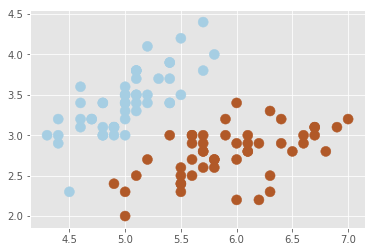

In [6]:
plt.figure()
plt.scatter(data[:,0], data[:,1],c=target, cmap=plt.cm.Paired, s=100)

In [7]:
X_train, X_test, y_train,y_test = model_selection.train_test_split(data,
            target, test_size=0.1, random_state=42)

In [9]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [17]:
lr = cv2.ml.LogisticRegression_create()
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [18]:
lr.setIterations(100)

In [19]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [20]:
lr.get_learnt_thetas()

array([[-0.04109114, -0.01968078, -0.16216497,  0.28704914,  0.11945517]],
      dtype=float32)

测试

In [21]:
ret, y_pred = lr.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [22]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0